# **1. Preâmbulo**

O que veremos?

- Complemento de conteúdo da aula "Operações Pontuais (Ponto a Ponto)": interpolação de dados
- Introdução às plotagens de gráficos em 2D e 3D

Recomendações:

- Caso já não tenha feito, assista os vídeos de nivelamento de Python disponíveis no Moodle
- Se já possui noção da linguagem, mas se considere sem prática, assista, em especial, os últimos vídeos do material em questão
- Lembre-se de **salvar** de tempos em tempos seu Notebook. Ao contrário da maioria das ferramentas da plataforma da Google, o Colab necessita de salvamento de tempos em tempos

## **1.1 Importações de módulos Python (bibliotecas)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits import mplot3d

## **1.2 Parâmetros gerais**

In [2]:
# Altere o path abaixo para o caminho de seu Drive
path = '/content/drive/MyDrive/2023 1/PDI/Notebooks-aulas/Transformações Geométricas/'

# **2. Interpolação**

## **2.1. Unidimensional**

Primeiro, vamos estabelecer alguns parâmetros:

In [3]:
# Controla o número de pontos de dados produzidos
n_pontos = 15

# Fator de escala para plotagem de gráfico para melhor visualização
fator = 10

Vamos também produzir algumas sequências de dados. Os dados terão uma dimensão $x$, representando uma variável independente qualquer, e uma dimensão $y$, representando uma variável dependente de $x$ qualquer. Ou seja, $y = f(x)$. Por exemplo, $x$ pode ser o tempo, enquanto $y$ pode representar um preço de venda de um produto.

Nos nossos casos aqui, manteremos os valores de $x$ sempre ordenados, para facilitar as visualizações.

#### **Produzindo valores para $x$**

In [4]:
# Geramos um array com n_pontos igualmente espaçados, ordenados, entre 0 e 50 (inclusive)
x = np.linspace(1, 50, n_pontos, endpoint=True)

#### **Caso 1: $y$ aleatório**

In [5]:
# Produção de array com n_pontos valores aleatórios de y (valores sorteados entre 0 e 60)
yrand = np.random.randint(0, 60, n_pontos)

#### **Caso 2: $y$ senoidal**

In [6]:
# Produção de uma senoide sobre os valores de xsin
ysin = 40*np.sin(3/x + x) + 40

#### **Visualizando as sequências de dados**

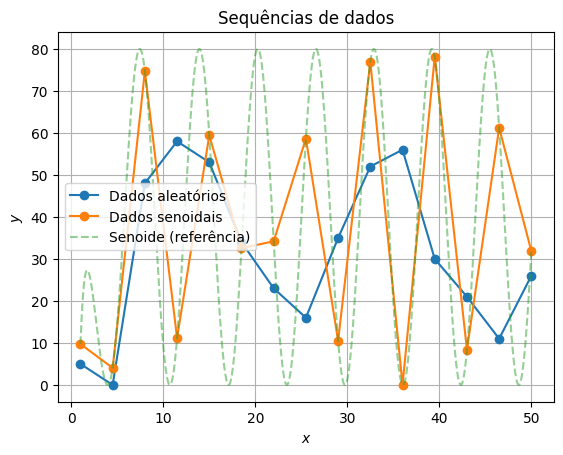

In [7]:
# Cria uma senoide em "alta definição" para referência
xaux = np.linspace(1, 50, n_pontos*200, endpoint=True)
yaux = 40*np.sin(3/xaux + xaux) + 40

# Plota dados
plt.title('Sequências de dados')
plt.plot(x, yrand, 'o-', label='Dados aleatórios')
plt.plot(x, ysin, 'o-', label='Dados senoidais')
plt.plot(xaux, yaux, '--', label='Senoide (referência)', alpha=0.5)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

#### **Interpolando uma sequência**

Veremos aqui 4 tipos de funções interpoladoras para estimar valores intermediários:

- Linear
- Quadrática
- Cúbica
- Vizinho mais próximo

Para isso, vamos utilizar um dicionário Python, onde possamos identificar o tipo pelo seu nome. Esta estrutura será útil em dois momentos, vistos a seguir.

In [8]:
tipos = {
    'Linear': 'linear',
    'Vizinho Mais Próximo': 'nearest',
    'Quadrática': 'quadratic',
    'Cúbica': 'cubic'
}

No início deste Notebook, importamos o submódulo `interpolate`, da biblioteca `scipy`. Ele dá suporte a diversos esquemas de interpolação. Vejamos primeiro o caso unidimensional.

Nós vamos instanciar um objeto, a nossa função interpoladora, a partir dos dados de entrada, ajustando um determinado tipo de curva ao mesmo. Neste primeiro exemplo, vamos utilizar a função linear.

In [9]:
# Estabelecendo uma função interpoladora linear a partir dos dados aleatórios
func_interp = interpolate.interp1d(x, yrand, kind='cubic')

Na sequência, vamos criar novos valores para a variável $x$, para os quais desejamos estimar os valores intermediários. Uma interpolação deve ter seus valores contido no intervalo $[max(x), min(x)]$, dos valores "reais" (ou observados), o $x$ original.

Vamos estimar um número de pontos $n$ vezes maior que os dados originais para $x$. No caso, vamos utilizar o valor salvo no parâmetro `fator`.

In [10]:
# Produzindo novos valores igualmente espaçado, mas em quantidade bem superior ao x original
novox = np.linspace(np.min(x), np.max(x), n_pontos*fator, endpoint=True)

Vamos aplicar a interpolação, que estimará os valores intermediários de $y$ para os novos valores intermediários de $x$, de acordo com a aproximação linear obtida e salva em `func_interp`.

In [11]:
novoy = func_interp(novox)

Por fim, produziremos um plot de um gráfico juntando os valores originais e os interpolados.

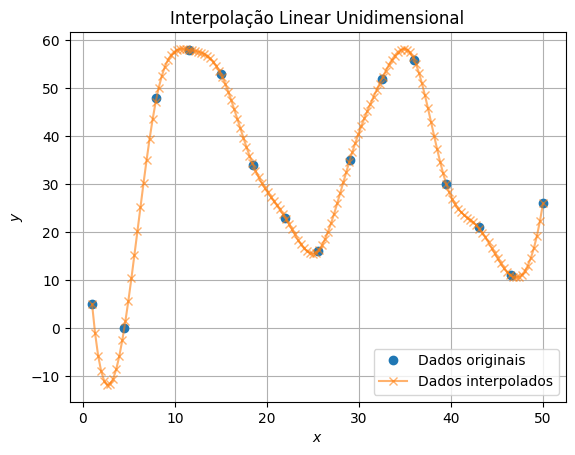

In [12]:
plt.title('Interpolação Linear Unidimensional')
plt.plot(x, yrand, 'o', label='Dados originais')
plt.plot(novox, novoy, '-x', label='Dados interpolados', alpha=0.6)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

#### **Generalizando**

Vamos criar, agora, uma função para generalizar e parametrizar o processo. Nela, poderemos controla o tipo de função interpoladora, bem como o fator de aumento no volume de dados original.

In [13]:
def plot_interp1d(x, y, n_pontos, fator, tipo):
  func_interp = interpolate.interp1d(x, y, kind=tipos[tipo])
  novox = np.linspace(np.min(x), np.max(x), n_pontos*fator, endpoint=True)
  novoy = func_interp(novox)

  plt.title('Interpolação %s Unidimensional' % tipo)
  plt.plot(x, y, 'o', label='Dados originais')
  plt.plot(novox, novoy, '-x', label='Dados interpolados', alpha=0.6)
  plt.grid()
  plt.xlabel(R'$x$')
  plt.ylabel(R'$y$')
  plt.legend()
  plt.show()

#### **Testando o caso aleatório**

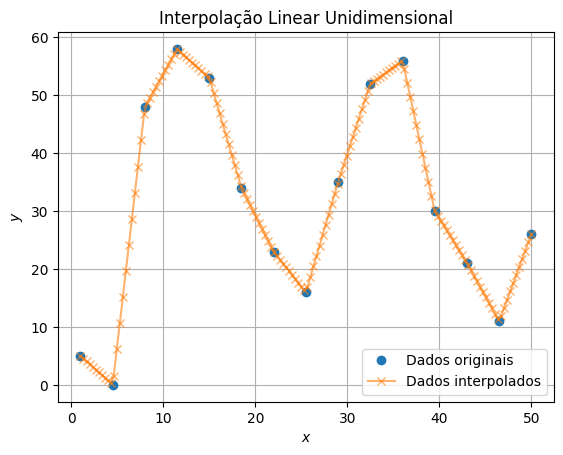

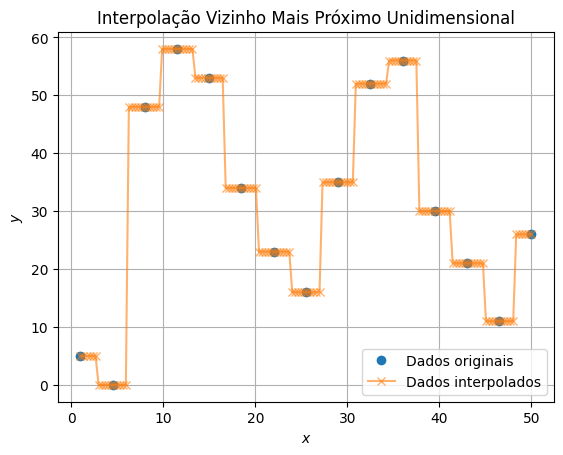

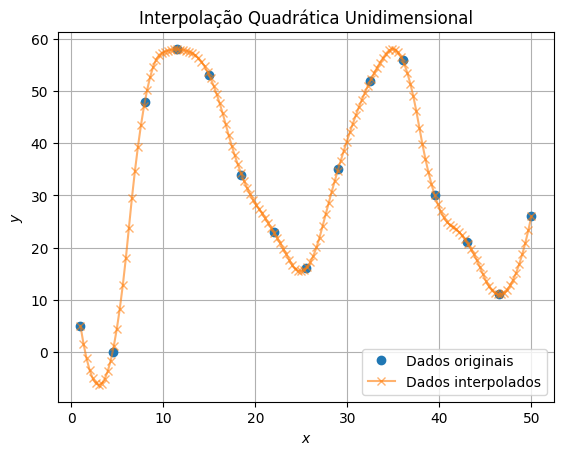

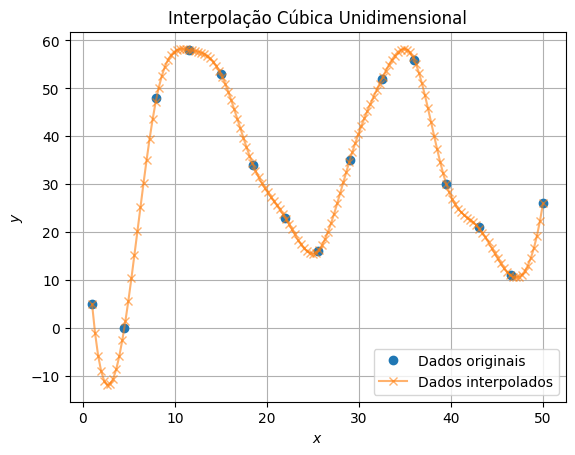

In [14]:
plot_interp1d(x, yrand, n_pontos, fator, 'Linear')
plot_interp1d(x, yrand, n_pontos, fator, 'Vizinho Mais Próximo')
plot_interp1d(x, yrand, n_pontos, fator, 'Quadrática')
plot_interp1d(x, yrand, n_pontos, fator, 'Cúbica')

#### **Testando o caso senoidal**

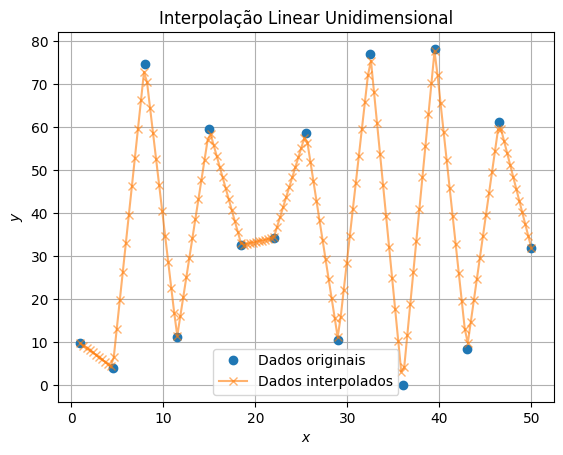

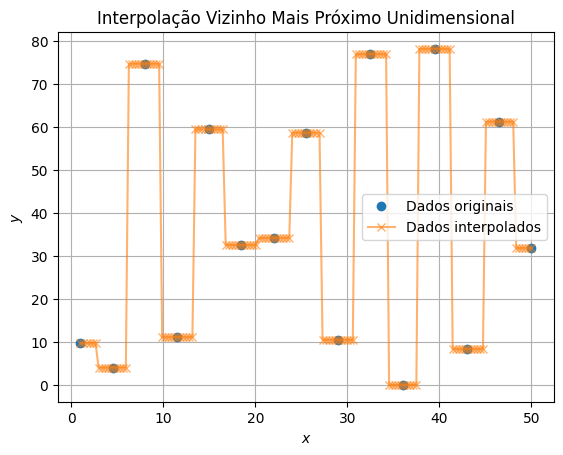

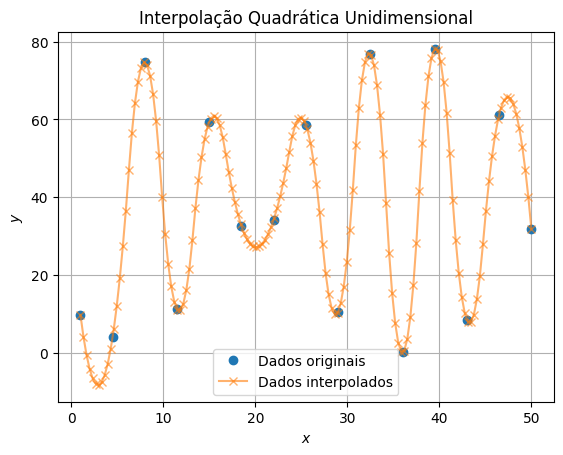

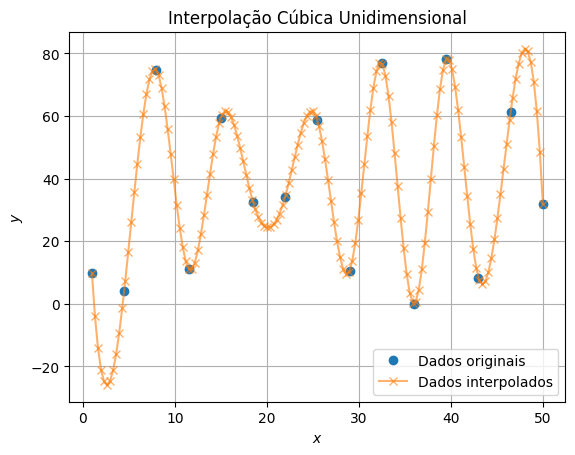

In [15]:
plot_interp1d(x, ysin, n_pontos, fator, 'Linear')
plot_interp1d(x, ysin, n_pontos, fator, 'Vizinho Mais Próximo')
plot_interp1d(x, ysin, n_pontos, fator, 'Quadrática')
plot_interp1d(x, ysin, n_pontos, fator, 'Cúbica')

#### **Observações gerais:**

- Note que, em todos casos, a função interpoladora "passa" sobre os dados originais, isto é, as funções que estimam valores para $y$ cometem erro zero para os dados originais sobre as quais foram ajustadas.

- Qual a melhor função? É uma questão difícil de saber, pois, muito frequentemente, não conhecemos a função ou comportamento que produziu os dados originais, como no caso dos dados aleatórios. Aliás, é exatamente isso que estamos tentando estimar com a interpolação.

- Como decidir qual melhor função? Também é uma questão difícil. Normalmente, o especialista da área da qual os dados são originados possui uma intuição sobre o tipo de forma de função que se adequa bem aos dados. Uma alternativa é utilizar um tipo sofisticado de interpolação chamado *spline*, que não cobriremos aqui.

Especificamente no nosso caso da função senoide, como conhecemos a função que originou os dados, podemos estimar qual a melhor calculando-se a métrica RMSE (sim, a mesma do capítulo de métricas) dos valores aproximados pela interpolação para os valores que a função senoide calcula para os mesmos dados de entrada.

In [16]:
# Vamos utilizar novox como base
# Vamos calcular o valor da senoide sobre novox
Y = 40*np.sin(3/novox + novox) + 40

# Comparando dimensões
print(x.shape, novox.shape)
print(ysin.shape, Y.shape)

(15,) (150,)
(15,) (150,)


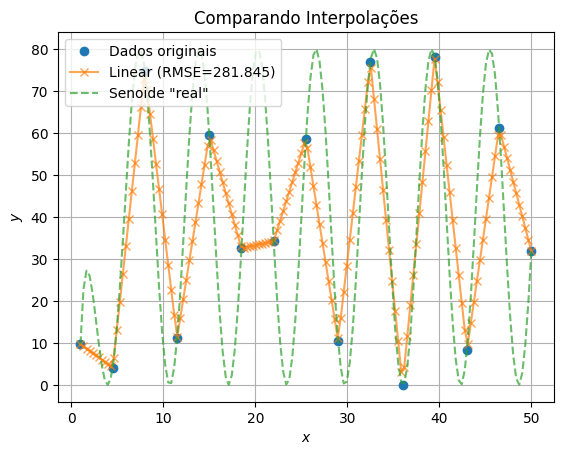

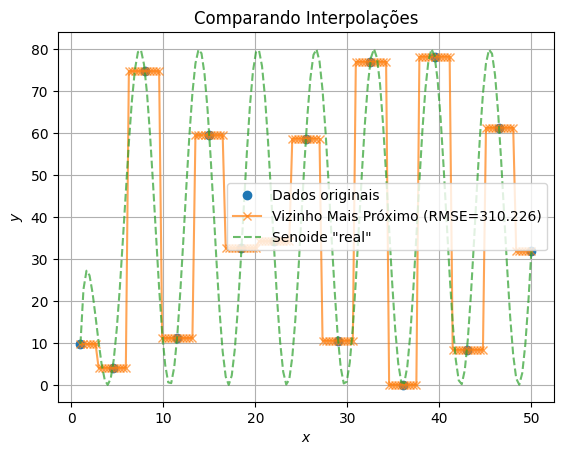

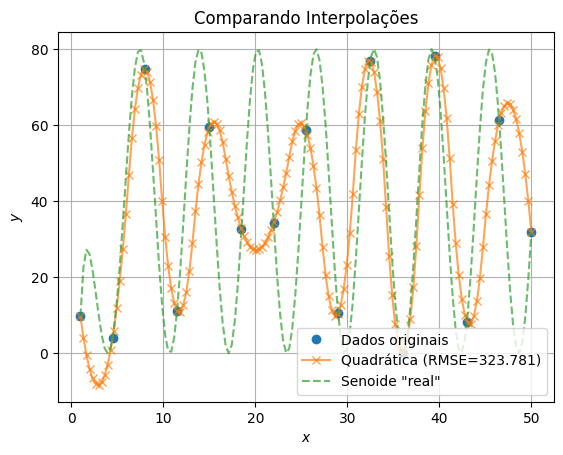

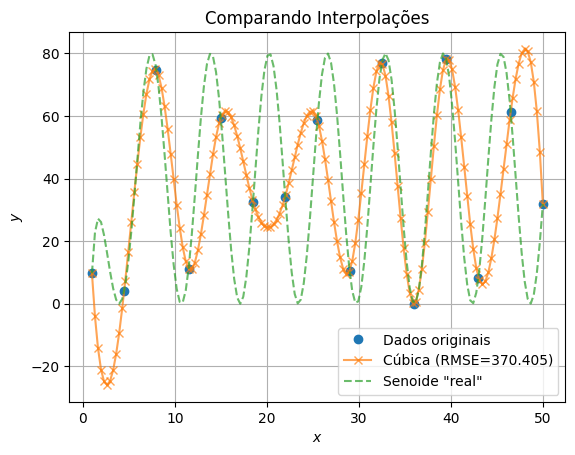

Melhor função: Linear (RMSE=281.845)


In [17]:
melhor = float('inf')
melhor_tipo = ''

# Produzindo a aproximação obtida por cada função
for tipo in tipos:
  plt.title('Comparando Interpolações')
  plt.plot(x, ysin, 'o', label='Dados originais')

  func_interp = interpolate.interp1d(x, ysin, kind=tipos[tipo])
  novoy = func_interp(novox)
  rmse = np.sqrt(np.sum((Y - novoy)**2))
  if rmse < melhor:
    melhor = rmse
    melhor_tipo = tipo
  rotulo = '%s (RMSE=%.3f)' % (tipo, rmse)

  plt.plot(novox, novoy, '-x', label=rotulo, alpha=0.7)
  plt.plot(novox, Y, '--', label='Senoide "real"', alpha=0.7)

  plt.grid()
  plt.xlabel(R'$x$')
  plt.ylabel(R'$y$')
  plt.legend()
  plt.show()

print('Melhor função: %s (RMSE=%.3f)' % (melhor_tipo, melhor))

A qualidade da interpolação também depende muito do comportamento dos dados de entrada. Vejamos um exemplo onde as funções interpoladoras mostradas aqui podem funcionar bem...

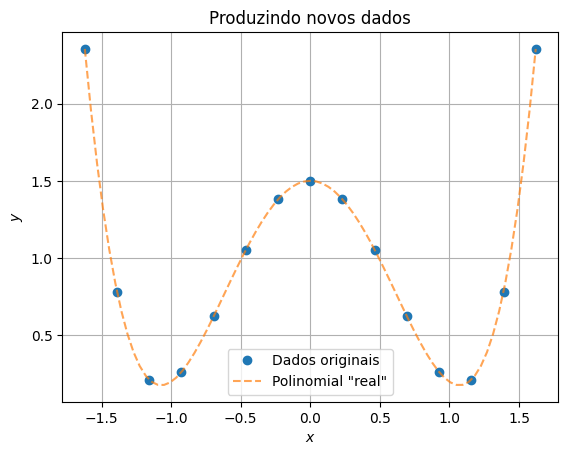

In [18]:
def polinomio(X):
  return X**4 - 2.3*X**2 + 1.5

fator = 5

xpoly = (x - np.mean(x)) / np.std(x)
ypoly = polinomio(xpoly)

novoxPoly = np.linspace(np.min(xpoly), np.max(xpoly), fator*n_pontos, endpoint=True)
Ypoly = polinomio(novoxPoly)

plt.title('Produzindo novos dados')
plt.plot(xpoly, ypoly, 'o', label='Dados originais')
plt.plot(novoxPoly, Ypoly, '--', label='Polinomial "real"', alpha=0.7)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

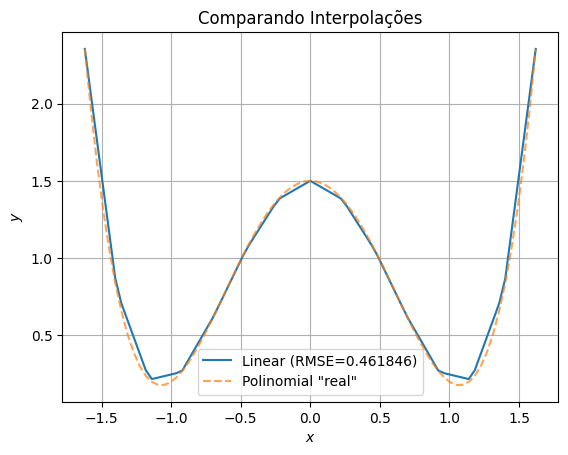

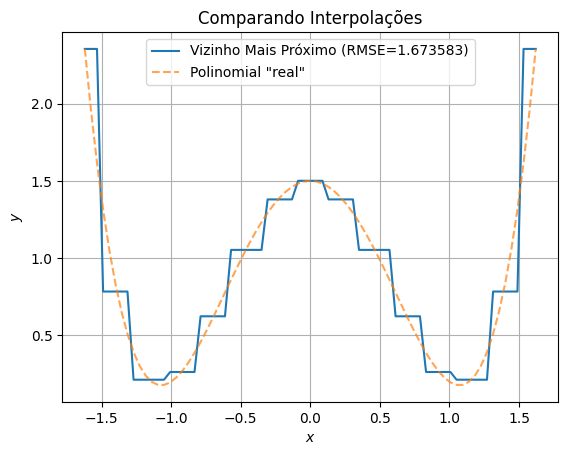

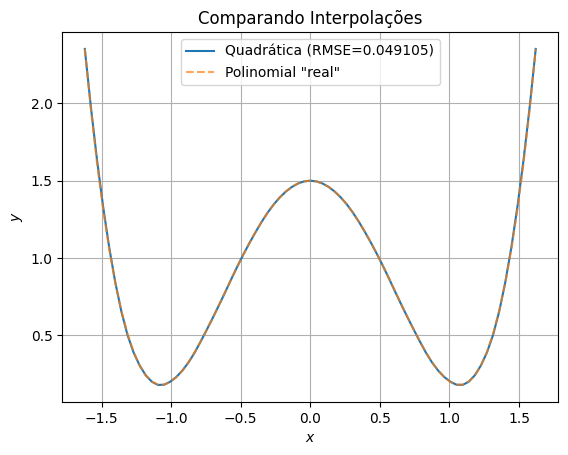

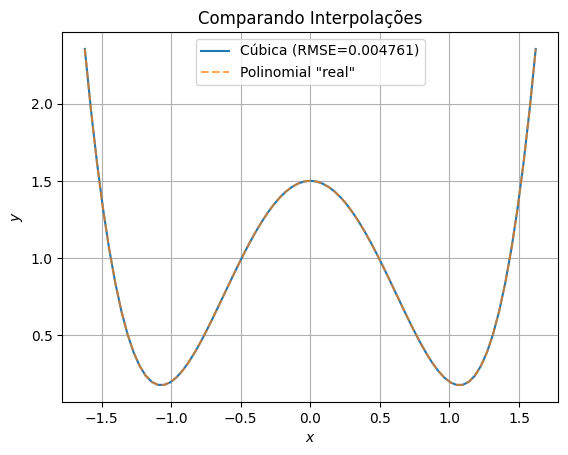

Melhor função: Cúbica (RMSE=0.004761)


In [19]:
melhor = float('inf')
melhor_tipo = ''

# Produzindo a aproximação obtida por cada função
for tipo in tipos:
  plt.title('Comparando Interpolações')
  
  func_interp = interpolate.interp1d(xpoly, ypoly, kind=tipos[tipo])
  novoy = func_interp(novoxPoly)
  rmse = np.sqrt(np.sum((Ypoly - novoy)**2))
  if rmse < melhor:
    melhor = rmse
    melhor_tipo = tipo
  rotulo = '%s (RMSE=%.6f)' % (tipo, rmse)

  plt.plot(novoxPoly, novoy, '-', label=rotulo)
  plt.plot(novoxPoly, Ypoly, '--', label='Polinomial "real"', alpha=0.7)

  plt.grid()
  plt.xlabel(R'$x$')
  plt.ylabel(R'$y$')
  plt.legend()
  plt.show()

print('Melhor função: %s (RMSE=%.6f)' % (melhor_tipo, melhor))

#### **Lidando com ruídos**

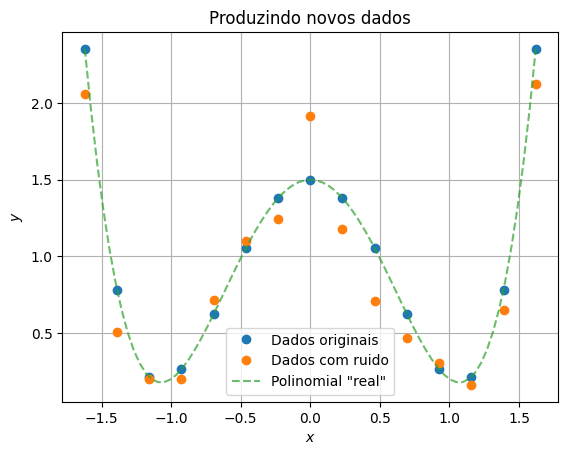

In [20]:
ruido = np.random.normal(size=ypoly.shape)
alfa = 0.15
ypolyRuido = ypoly + ypoly*(alfa*ruido)

plt.title('Produzindo novos dados')
plt.plot(xpoly, ypoly, 'o', label='Dados originais')
plt.plot(xpoly, ypolyRuido, 'o', label='Dados com ruido')
plt.plot(novoxPoly, Ypoly, '--', label='Polinomial "real"', alpha=0.7)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

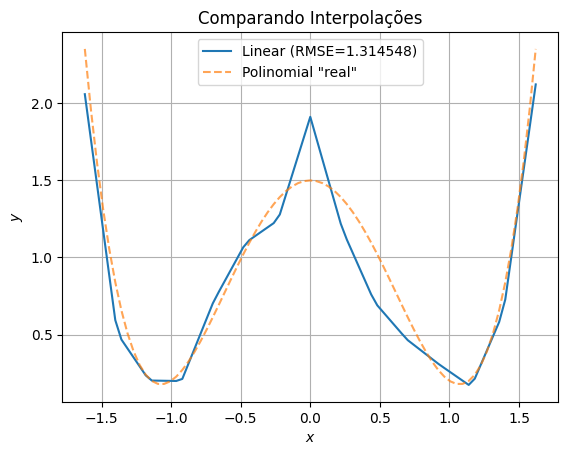

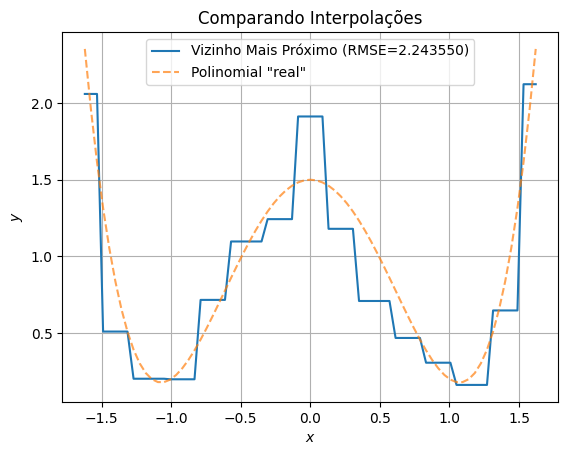

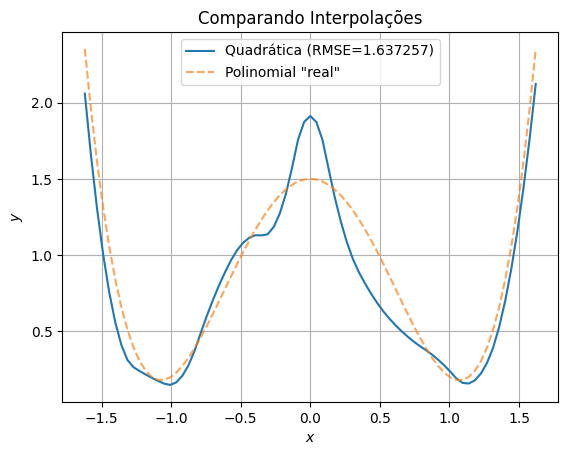

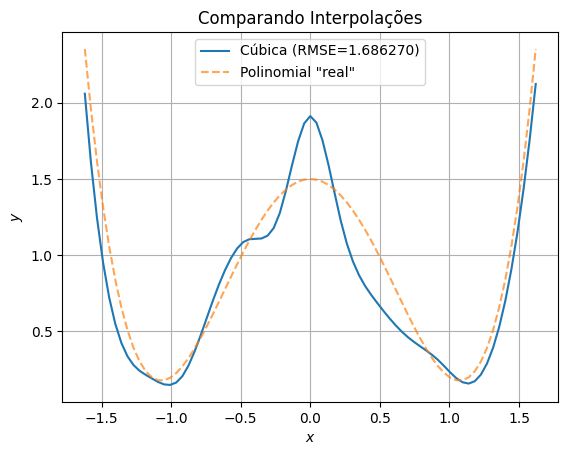

Melhor função: Linear (RMSE=1.314548)


In [21]:
melhor = float('inf')
melhor_tipo = ''

# Produzindo a aproximação obtida por cada função
for tipo in tipos:
  plt.title('Comparando Interpolações')
  
  func_interp = interpolate.interp1d(xpoly, ypolyRuido, kind=tipos[tipo])
  novoy = func_interp(novoxPoly)
  rmse = np.sqrt(np.sum((Ypoly - novoy)**2))
  if rmse < melhor:
    melhor = rmse
    melhor_tipo = tipo
  rotulo = '%s (RMSE=%.6f)' % (tipo, rmse)

  plt.plot(novoxPoly, novoy, '-', label=rotulo)
  plt.plot(novoxPoly, Ypoly, '--', label='Polinomial "real"', alpha=0.7)

  plt.grid()
  plt.xlabel(R'$x$')
  plt.ylabel(R'$y$')
  plt.legend()
  plt.show()

print('Melhor função: %s (RMSE=%.6f)' % (melhor_tipo, melhor))

- Note que devido ao fato de ter por obrigatoriedade passar pelos pontos de dados originais, a interpolação é sensível à presença de ruídos nos dados e deve ser usada com parcimônia

- Neste caso, pode-se utilizar um método de *ajuste de curvas*, que não necessariamente visa passar pelos dados, mas sim diminuir o erro cometido entre a aproximação e os dados reais

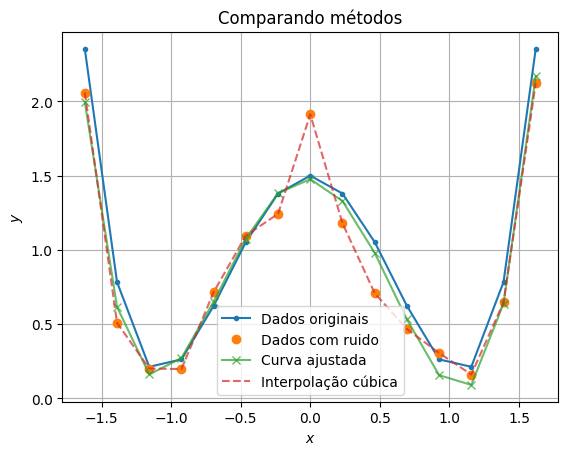

RMSE:
	 Ajuste x dados com ruído: 0.6052
	 Ajuste x dados originais: 0.5077
	Interp. x dados com ruído: 0.0000
	Interp. x dados originais: 0.7899


In [22]:
# Importa biblioteca de otimização
from scipy import optimize

# RMSE
def rmse(Y, y):
  return np.sqrt(np.sum((Y - y)**2))

# Curva polinomial de quarto grau que será ajustada
def funcao_obj(coefs, x):
  return coefs[0]*x**4 + coefs[1]*x**3 + coefs[2]*x**2 + coefs[3]*x + coefs[4]

# Ajusta curva
def func_residuo(coefs, x, y):
  ylinha = funcao_obj(coefs, x)
  return np.abs(y - ylinha)
res = optimize.least_squares(func_residuo, np.zeros(5)+0.1, args=(xpoly, ypolyRuido), bounds=(-3,3))
coefs = res.x

# Calcula valores pelos coeficientes encontrados
yCurva = funcao_obj(coefs, xpoly)

# Interpolação
func_interp = interpolate.interp1d(xpoly, ypolyRuido, kind='cubic')
novoy = func_interp(xpoly)

# Plota comparação
plt.title('Comparando métodos')
plt.plot(xpoly, ypoly, '.-', label='Dados originais')
plt.plot(xpoly, ypolyRuido, 'o', label='Dados com ruido')
plt.plot(xpoly, yCurva, 'x-', label=R'Curva ajustada', alpha=0.7)
plt.plot(xpoly, novoy, '--', label='Interpolação cúbica', alpha=0.7)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

print('RMSE:')
print('\t Ajuste x dados com ruído: %.4f' % rmse(yCurva, ypolyRuido))
print('\t Ajuste x dados originais: %.4f' % rmse(yCurva, ypoly))
print('\tInterp. x dados com ruído: %.4f' % rmse(novoy, ypolyRuido))
print('\tInterp. x dados originais: %.4f' % rmse(novoy, ypoly))

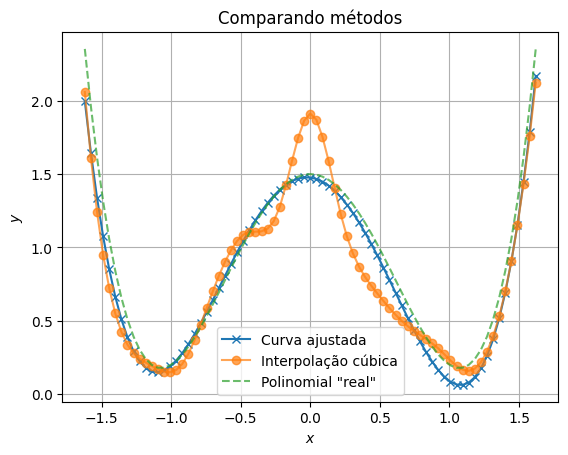

RMSE:
	 Ajuste x polinomial "real": 0.9682
	Interp. x polinomial "real": 1.6863


In [23]:
novoyCurva = funcao_obj(coefs, novoxPoly)
novoyInterp = func_interp(novoxPoly)

# Plota comparação
plt.title('Comparando métodos')
plt.plot(novoxPoly, novoyCurva, 'x-', label='Curva ajustada')
plt.plot(novoxPoly, novoyInterp, 'o-', label='Interpolação cúbica', alpha=0.7)
plt.plot(novoxPoly, Ypoly, '--', label='Polinomial "real"', alpha=0.7)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

print('RMSE:')
print('\t Ajuste x polinomial "real": %.4f' % rmse(novoyCurva, Ypoly))
print('\tInterp. x polinomial "real": %.4f' % rmse(novoyInterp, Ypoly))

- Note que o ajuste de curvas "generaliza melhor" o comportamento dos dados

## **2.2. Bidimensional**

Primeiro, vamos restabelecer um parâmetro:

In [24]:
fator = 3

Uma vez que o funcionamento da interpolação foi entendido e as observações gerais foram feitas, vamos ser mais objetivos no estudo da interpolação bidimensional.

#### **Criando um conjunto de dados arbitrários**

In [25]:
# Dados originais
Z = np.array(
    [
        [50, 120, 98, 47],
        [47, 213, 209, 123],
        [54, 51, 39, 22],
        [29, 43, 67, 122]
    ]
)

x = np.arange(0, Z.shape[1])
y = np.arange(0, Z.shape[0])

#### **Exibindo os dados**

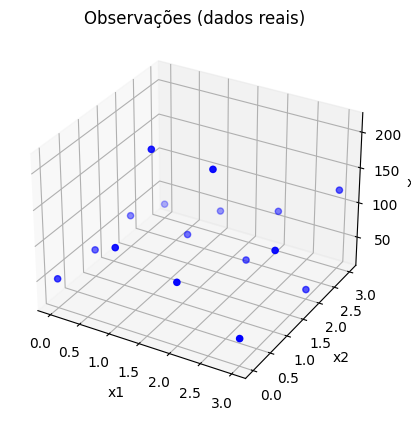

In [26]:
# Cria um "grid" com os pares x e y
X,Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Observações (dados reais)')
plt.show()

#### **Interpolando**

In [27]:
# Novos dados de entrada
novox = np.linspace(np.min(x), np.max(x), fator*Z.shape[1]-1)
novoy = np.linspace(np.min(y), np.max(y), fator*Z.shape[0]-1)
novoX,novoY = np.meshgrid(novox, novoy)

# Interpolação
func_interp = interpolate.RectBivariateSpline(x, y, Z)
novoZ = func_interp(novox, novoy)

print(x.shape, novox.shape)
print(y.shape, novoy.shape)
print(Z.shape, novoZ.shape)

(4,) (11,)
(4,) (11,)
(4, 4) (11, 11)


#### **Exibindo resultados**

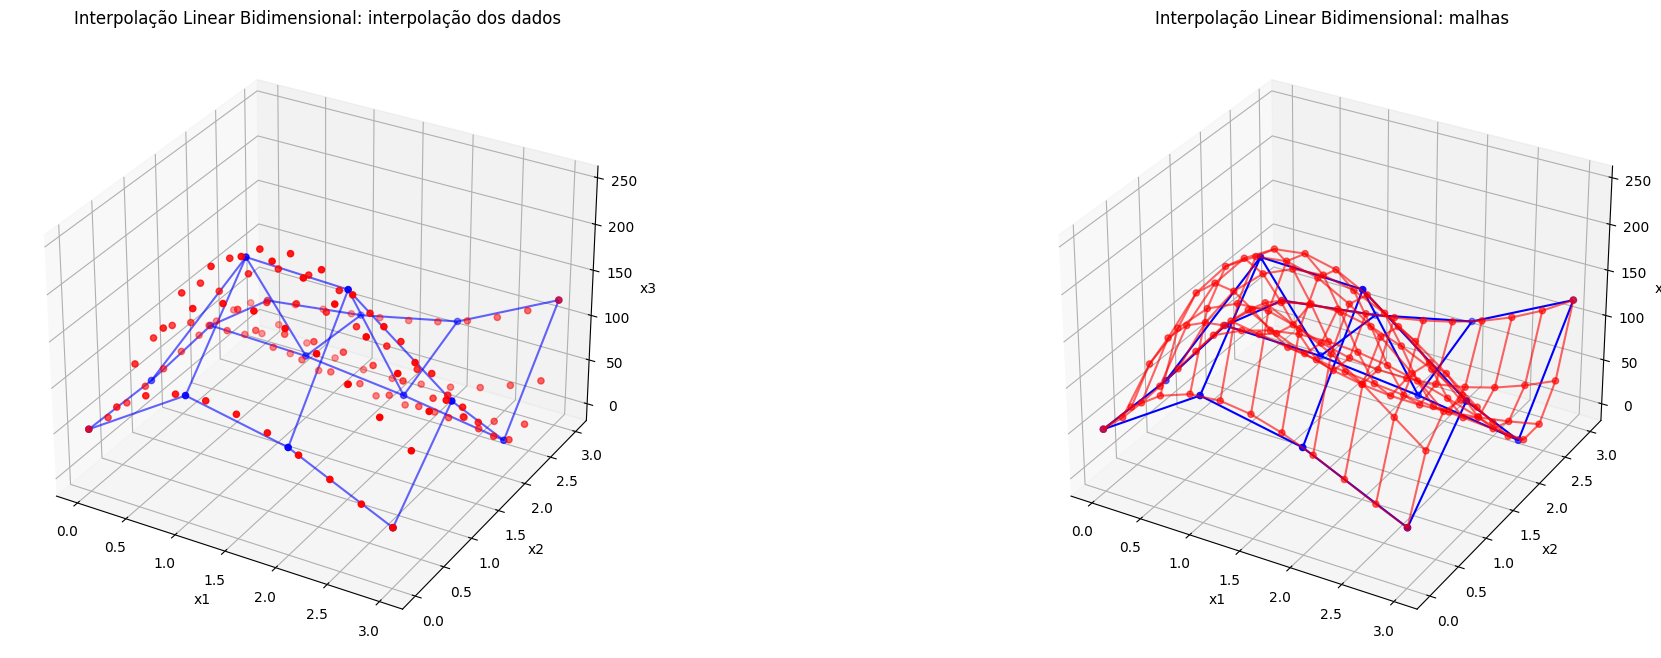

In [28]:
fig = plt.figure(figsize=(24,8))
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax2 = plt.subplot(1, 2, 2, projection='3d')

ax1.scatter(X, Y, Z, color='blue')
ax1.plot_wireframe(X, Y, Z, color='blue', alpha=0.6)
ax1.scatter(novoX, novoY, novoZ, color='red')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('x3')
ax1.set_title('Interpolação Linear Bidimensional: interpolação dos dados')

ax2.scatter(X, Y, Z, color='blue')
ax2.plot_wireframe(X, Y, Z, color='blue')
ax2.scatter(novoX, novoY, novoZ, color='red', alpha=0.6)
ax2.plot_wireframe(novoX, novoY, novoZ, color='red', alpha=0.6)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('x3')
ax2.set_title('Interpolação Linear Bidimensional: malhas')

plt.show()

## **2.3. Subamostragem**

A interpolação também pode ser utilizada para subamostrar dados. Vejamos, primeiro o caso unidimensional.

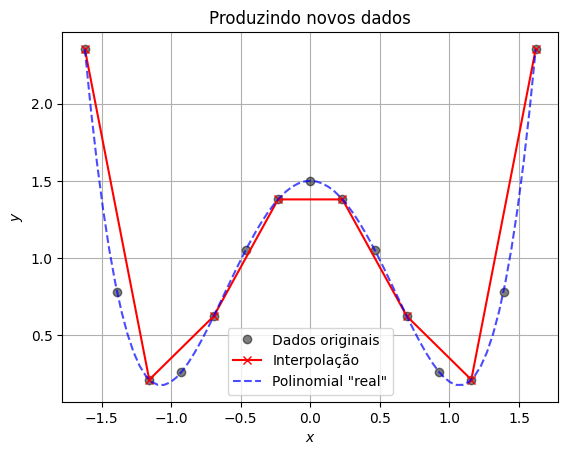

In [29]:
# Calcula a nova dimensão dos dados
fator = 0.5
novaDim = round(fator*n_pontos)

# Dados "reais"
XPoly = np.linspace(np.min(xpoly), np.max(xpoly), 5*len(xpoly), endpoint=True)
Ypoly = polinomio(XPoly)

# Subamostragem: interpolação
novoxPoly = np.linspace(np.min(xpoly), np.max(xpoly), novaDim, endpoint=True)
func_interp = interpolate.interp1d(xpoly, ypoly, kind='cubic')
novoy = func_interp(novoxPoly)

plt.title('Produzindo novos dados')
plt.plot(xpoly, ypoly, 'o', label='Dados originais', color='black', alpha=0.5)
plt.plot(novoxPoly, novoy, '-x', label='Interpolação', color='red')
plt.plot(XPoly, Ypoly, '--', label='Polinomial "real"', color='blue', alpha=0.7)
plt.grid()
plt.xlabel(R'$x$')
plt.ylabel(R'$y$')
plt.legend()
plt.show()

E também funciona no caso bidimensional. Porém, ao invé de utilizar a matriz Z utilizada anteriormente, que possuía apenas 16 pontos, vamos utilizar uma matriz maior, para melhor visualização dos resultados. Há uma matriz salva, como arquivo binário, na pasta do Drive. Ela está no arquivo `matriz2d.npy` e vamos carregá-la utilizando o método `np.load`:

In [30]:
matriz = np.load(path + 'matriz2d.npy', allow_pickle=True)
print('Tamanho da matriz:', matriz.shape)

Tamanho da matriz: (38, 44)


#### **Plotagem dos dados**

Dimensões de x e y: (38,) (44,)
Dimensões dos arrays de grid: (44, 38) (44, 38)


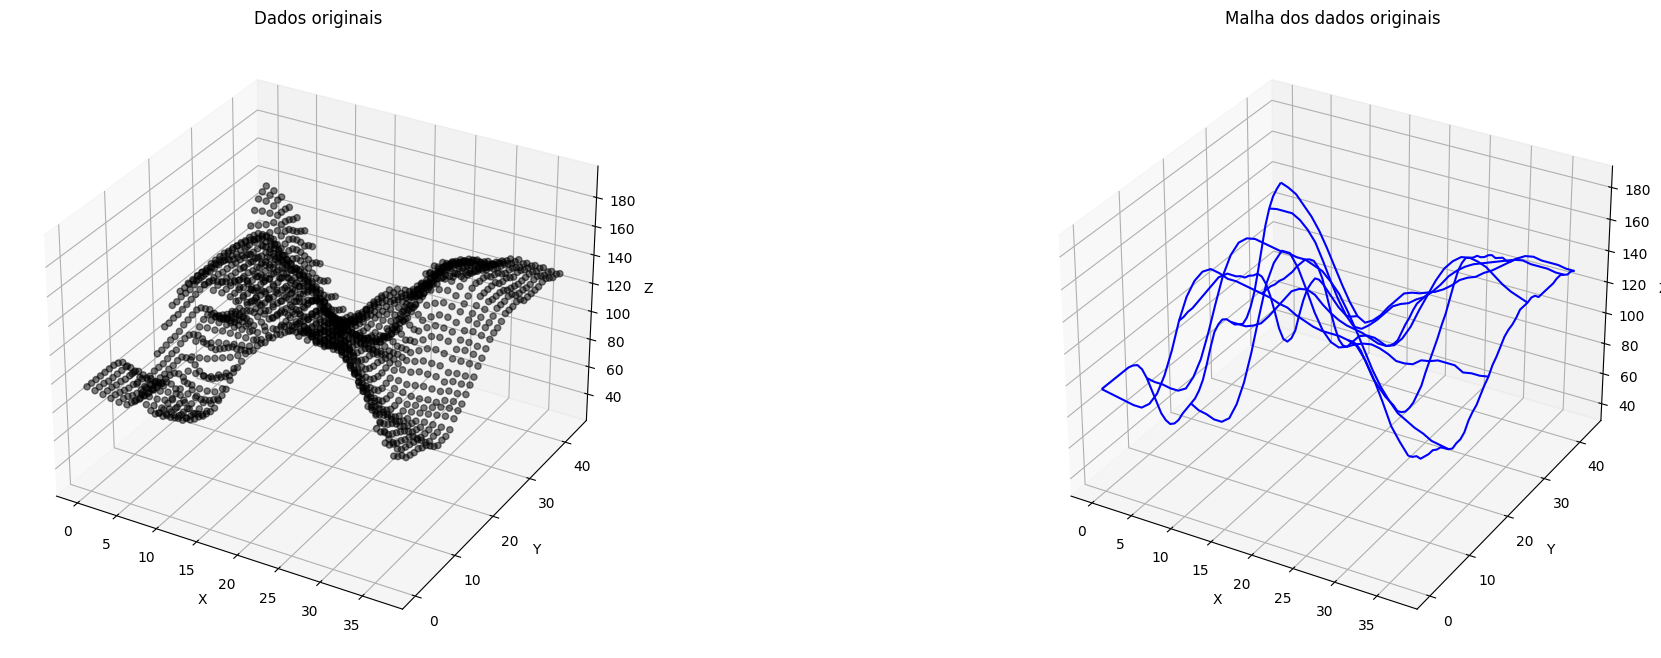

In [31]:
# Cria vetores de índices
x = np.arange(matriz.shape[0])
y = np.arange(matriz.shape[1])
print('Dimensões de x e y:', x.shape, y.shape)

# Cria grid com os índices
X,Y = np.meshgrid(x,y)
print('Dimensões dos arrays de grid:', X.shape, Y.shape)

# O Z (apenas para plotagem) é a transposta da matriz de dados
# (analise os índices e irá entender)
Z = matriz.T

# Plotagem propriamente dita
fig = plt.figure(figsize=(24,8))
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax2 = plt.subplot(1, 2, 2, projection='3d')

ax1.scatter(X, Y, Z, color='black', alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Dados originais')

ax2.plot_wireframe(X, Y, Z, color='blue', cstride=10, rstride=10)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Malha dos dados originais')

plt.show()

In [32]:
# Subamostragem
novox = np.linspace(np.min(x), np.max(x), round(fator*len(x)))
novoy = np.linspace(np.min(y), np.max(y), round(fator*len(y)))
novoX,novoY = np.meshgrid(novox, novoy)

# Interpolação
func_interp = interpolate.RectBivariateSpline(x, y, matriz)
novoZ = func_interp(novox, novoy)

print(x.shape, novox.shape)
print(y.shape, novoy.shape)
print(Z.shape, novoZ.shape)

(38,) (19,)
(44,) (22,)
(44, 38) (19, 22)


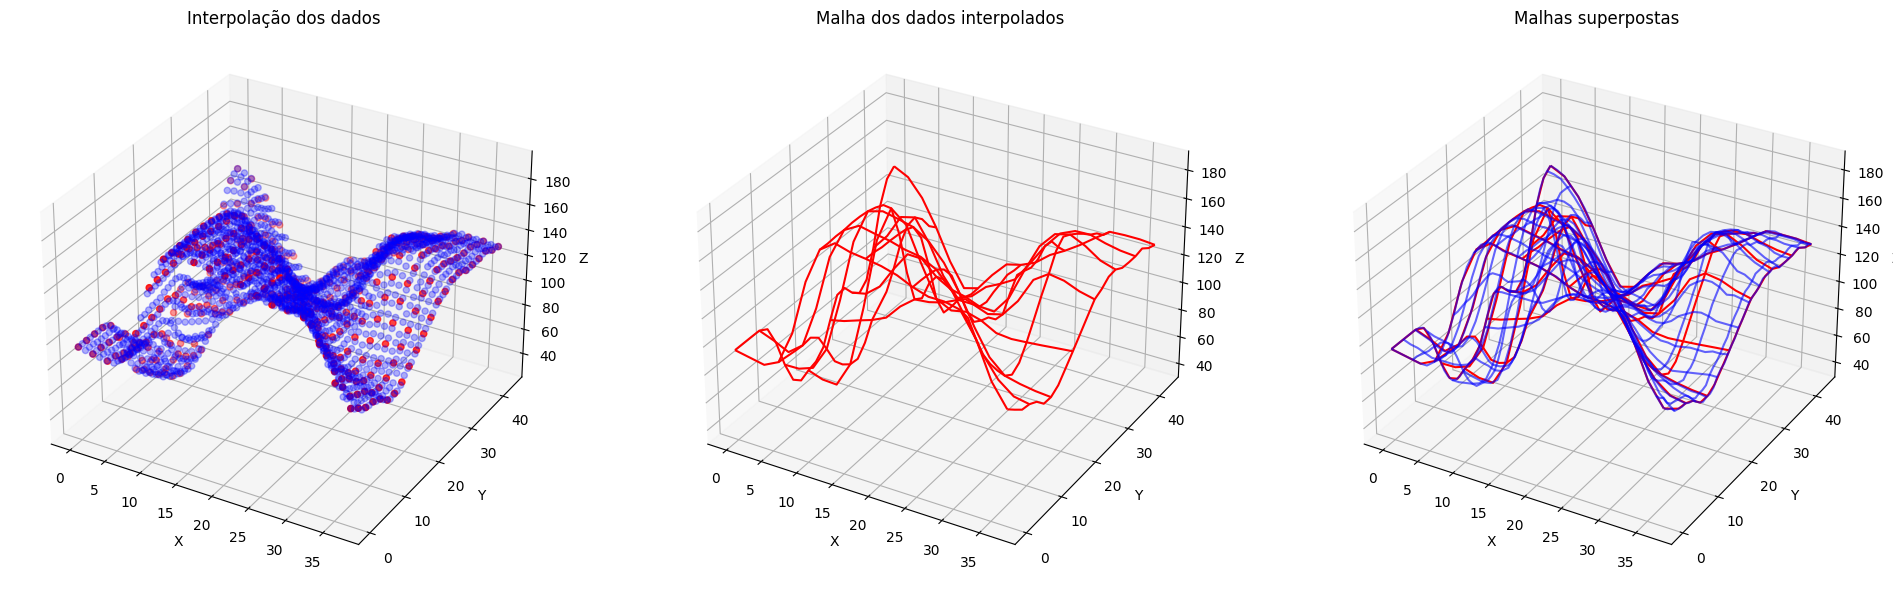

In [33]:
# O Z (apenas para plotagem) é a transposta da matriz de dados
# (analise os índices e irá entender)
Zplot = novoZ.T

# Plotagem propriamente dita
fig = plt.figure(figsize=(24,8))
ax1 = plt.subplot(1, 3, 1, projection='3d')
ax2 = plt.subplot(1, 3, 2, projection='3d')
ax3 = plt.subplot(1, 3, 3, projection='3d')

ax1.scatter(X, Y, Z, color='blue', alpha=0.3)
ax1.scatter(novoX, novoY, Zplot, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Interpolação dos dados')

ax2.plot_wireframe(novoX, novoY, Zplot, color='red', cstride=3, rstride=3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Malha dos dados interpolados')

ax3.plot_wireframe(X, Y, Z, color='blue', cstride=3, rstride=3, alpha=0.6)
ax3.plot_wireframe(novoX, novoY, Zplot, color='red', cstride=3, rstride=3)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Malhas superpostas')

plt.show()